In [19]:
from cpmm import CPMM
from rikiddo import RikiddoScoringRule
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt

initial_outcome = ['A', 'B']

n = 500
outcome = 0.001
amount = np.random.random([n]) * 500. 
outcomes = []
values = list(range(10))
for i in range(n):
    #outcomes += random.choices(list(range(len(initial_outcome))), weights=[random.choice(values),
    #                                                                       random.choice(values)])
    outcomes += random.choices(list(range(len(initial_outcome))))
    
operation = []
for i in range(n):
    for j in range(0,3):
        operation += [j]

outcomes = np.array(outcomes)
operation = np.array(operation)

In [20]:
initial_state = {0: 10000, 1: 10000, 'ZTG':10000}
cpmm = CPMM(initial_state = initial_state, fee = 0.03)

In [21]:
rsc = RikiddoScoringRule(initial_outcome, n_params = [1, 8, 2]) 
rsc.initial_liquidity(initial_outcome, 10000)

,name,shares,outcome,paid,fee_cost,lp
0,Zeitgeist,10000,0,5000.0,0,1
1,Zeitgeist,10000,1,5000.0,0,1


In [22]:
for i, a, o, r in zip(range(n),amount, outcomes, operation):
    if r == 0:
        #buy shares
        cpmm.buy_shares(a, asset_out= o)
    elif r == 1:
        #sell shares
        cpmm.sell_shares(a, asset_in=o)
    else:
        #provide liquidity
        cpmm.provide_liquidity(id= i, amount = a)
        
    print(cpmm.get_prices())

{0: 0.5021326524832466, 1: 0.49786734751675354}
{0: 0.5000914227810591, 1: 0.4999085772189409}
{0: 0.5000880905926977, 1: 0.4999119094073023}
{0: 0.4979311233141913, 1: 0.5020688766858087}
{0: 0.49937220628417905, 1: 0.500627793715821}
{0: 0.4993819876632994, 1: 0.5006180123367006}
{0: 0.49296175099352474, 1: 0.5070382490064752}
{0: 0.48963014364591717, 1: 0.5103698563540829}
{0: 0.48991041657523926, 1: 0.5100895834247609}
{0: 0.47863229412551433, 1: 0.5213677058744857}
{0: 0.48043823445004935, 1: 0.5195617655499508}
{0: 0.48074889469796095, 1: 0.5192511053020391}
{0: 0.47670844755375236, 1: 0.5232915524462476}
{0: 0.47255258458015287, 1: 0.5274474154198472}
{0: 0.4733000018509997, 1: 0.5266999981490004}
{0: 0.4804903945858211, 1: 0.5195096054141789}
{0: 0.4908567437222116, 1: 0.5091432562777884}
{0: 0.4909879394918534, 1: 0.5090120605081466}
{0: 0.48101460355576303, 1: 0.5189853964442369}
{0: 0.4810416121187865, 1: 0.5189583878812134}
{0: 0.4812407431824179, 1: 0.5187592568175822}
{0:

In [23]:
list(cpmm.get_prices().values())

[0.5154728288682112, 0.48452717113178884]

In [24]:
for i, a, o, r in zip(range(n),amount, outcomes, operation):
    if r == 0:
        #buy shares
        rsc.buy_shares('Trader-%d'%(i), a, int(o))
    elif r == 1:
        #sell shares
        rsc.sell_shares('Trader-%d'%(i), a, int(o))
    else:
        #provide liquidity
        rsc.liquidity_providing('Trader-%d'%(i), a)

    rsc.outcome_probability()

/Users/numacodes/Developer/Zeitgeist/rikiddo_cpmm_compare/rikiddo.py:123: RuntimeWarning: overflow encountered in exp
  return self.b*np.log(np.exp(x/self.b).sum())


In [25]:
rsc.outcome_probability()

array([1.00000000e+00, 7.57786277e-12])

In [26]:
#rsc._history

In [27]:
#cpmm._history

In [28]:
rsc_asset1 = []
rsc_asset2 = list([])
for i in list(rsc._history):
    rsc_asset1.append(i[0])
    rsc_asset2.append(i[1])

cpmm_asset1 = list([])
cpmm_asset2 = list([])
for i in cpmm._history:
    cpmm_asset1.append(i[0])
    cpmm_asset2.append(i[1])

assert(len(rsc_asset1) == len(cpmm_asset1) == len(rsc_asset2) == len(cpmm_asset2))

In [29]:
df = pd.DataFrame([rsc_asset1, rsc_asset2, cpmm_asset1, cpmm_asset2]).T
#df = df.T
df.columns = ['rsc_asset1', 'rsc_asset2', 'cpmm_asset1', 'cpmm_asset2']
df

,rsc_asset1,rsc_asset2,cpmm_asset1,cpmm_asset2
0,9.437407e-01,5.625929e-02,0.502133,0.497867
1,9.437407e-01,5.625929e-02,0.500091,0.499909
2,1.000000e+00,9.868596e-23,0.500088,0.499912
3,2.448103e-01,7.551897e-01,0.497931,0.502069
4,8.666030e-26,1.000000e+00,0.499372,0.500628
...,...,...,...,...
495,2.945713e-01,7.054287e-01,0.502122,0.497878
496,7.028084e-01,2.971916e-01,0.508352,0.491648
497,5.124106e-04,9.994876e-01,0.508231,0.491769
498,2.793990e-01,7.206010e-01,0.508360,0.491640


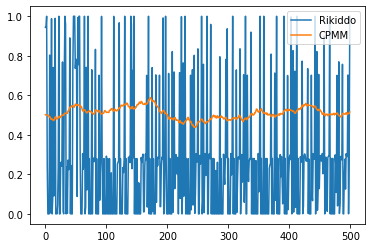

In [30]:
plt.plot(df['rsc_asset1'], label='Rikiddo')
plt.plot(df['cpmm_asset1'], label= 'CPMM')
plt.legend()
plt.show()

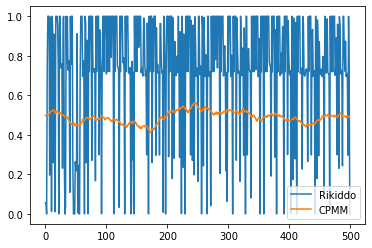

In [31]:
plt.plot(df['rsc_asset2'], label='Rikiddo')
plt.plot(df['cpmm_asset2'], label= 'CPMM')
plt.legend()
plt.show()

In [14]:
for i in range(10):
    first = random.choice([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.1, 1.2, 1.3, 1.4, 
                           1.5, 1.6, 1.7, 1.8, 1.9, 2, 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3])
    second = random.choice([1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5, 6.5, 7, 7.5, 8])
    print(f'Iterating for a first parameter equal to {first} and a second one equal to {second}')
    try:
        rsc = RikiddoScoringRule(initial_outcome, n_params = [first, second, 2]) 
        rsc.initial_liquidity(initial_outcome, 10000)
        for i, a, o, r in zip(range(n),amount, outcomes, operation):
            if r == 0:
                #buy shares
                rsc.buy_shares('Trader-%d'%(i), a, int(o))
            elif r == 1:
                #sell shares
                rsc.sell_shares('Trader-%d'%(i), a, int(o))
            else:
                #provide liquidity
                rsc.liquidity_providing('Trader-%d'%(i), a)


        rsc_asset1 = list([])
        rsc_asset2 = list([])
        for i in list(rsc._history):
            rsc_asset1.append(i[0])
            rsc_asset2.append(i[1])

        df[f'rsc_asset1_{first}_{second}'] = pd.Series(rsc_asset1)
        df[f'rsc_asset2_{first}_{second}'] = pd.Series(rsc_asset2)
    except:
        print('val error')
        pass

Iterating for a first parameter equal to 2.9 and a second one equal to 8


/Users/numacodes/Developer/Zeitgeist/rikiddo_cpmm_compare/rikiddo.py:123: RuntimeWarning: overflow encountered in exp
  return self.b*np.log(np.exp(x/self.b).sum())


Iterating for a first parameter equal to 2 and a second one equal to 1
Iterating for a first parameter equal to 0.8 and a second one equal to 7.5


/Users/numacodes/Developer/Zeitgeist/rikiddo_cpmm_compare/rikiddo.py:195: RuntimeWarning: invalid value encountered in double_scalars
  'unit_price': prices[1]/asset_2,


Iterating for a first parameter equal to 2.3 and a second one equal to 5.5
Iterating for a first parameter equal to 1.5 and a second one equal to 2.5
Iterating for a first parameter equal to 2.4 and a second one equal to 2.5
Iterating for a first parameter equal to 2.4 and a second one equal to 3


/Users/numacodes/Developer/Zeitgeist/rikiddo_cpmm_compare/rikiddo.py:44: RuntimeWarning: overflow encountered in exp
  K = np.exp(self.x/self.b)
/Users/numacodes/Developer/Zeitgeist/rikiddo_cpmm_compare/rikiddo.py:45: RuntimeWarning: invalid value encountered in true_divide
  result = K/K.sum()


val error
Iterating for a first parameter equal to 1.4 and a second one equal to 7
Iterating for a first parameter equal to 1.9 and a second one equal to 4
Iterating for a first parameter equal to 2 and a second one equal to 5.5


In [15]:
df

,rsc_asset1,rsc_asset2,cpmm_asset1,cpmm_asset2,rsc_asset1_2.9_8,rsc_asset2_2.9_8,rsc_asset1_2_1,rsc_asset2_2_1,rsc_asset1_0.8_7.5,rsc_asset2_0.8_7.5,...,rsc_asset1_1.5_2.5,rsc_asset2_1.5_2.5,rsc_asset1_2.4_2.5,rsc_asset2_2.4_2.5,rsc_asset1_1.4_7,rsc_asset2_1.4_7,rsc_asset1_1.9_4,rsc_asset2_1.9_4,rsc_asset1_2_5.5,rsc_asset2_2_5.5
0,7.520571e-02,9.247943e-01,0.497042,0.502958,2.673544e-01,7.326456e-01,3.333793e-01,6.666207e-01,3.186248e-02,9.681375e-01,...,2.295240e-01,7.704760e-01,3.180073e-01,6.819927e-01,1.260638e-01,8.739362e-01,2.415740e-01,7.584260e-01,2.249311e-01,7.750689e-01
1,7.520571e-02,9.247943e-01,0.500616,0.499384,2.673544e-01,7.326456e-01,3.333793e-01,6.666207e-01,3.186248e-02,9.681375e-01,...,2.295240e-01,7.704760e-01,3.180073e-01,6.819927e-01,1.260638e-01,8.739362e-01,2.415740e-01,7.584260e-01,2.249311e-01,7.750689e-01
2,2.960998e-24,1.000000e+00,0.500615,0.499385,7.741059e-23,1.000000e+00,2.611039e-21,1.000000e+00,1.319646e-24,1.000000e+00,...,5.066488e-23,1.000000e+00,3.366120e-22,1.000000e+00,6.896564e-24,1.000000e+00,5.103307e-23,1.000000e+00,2.949741e-23,1.000000e+00
3,7.488469e-01,2.511531e-01,0.508075,0.491925,5.971191e-01,4.028809e-01,6.237359e-01,3.762641e-01,8.007309e-01,1.992691e-01,...,6.661528e-01,3.338472e-01,6.067614e-01,3.932386e-01,6.893242e-01,3.106758e-01,6.367638e-01,3.632362e-01,6.334469e-01,3.665531e-01
4,1.000000e+00,8.666030e-26,0.513680,0.486320,1.000000e+00,8.666030e-26,1.000000e+00,8.666030e-26,1.000000e+00,8.666030e-26,...,1.000000e+00,8.666030e-26,1.000000e+00,8.666030e-26,1.000000e+00,8.666030e-26,1.000000e+00,8.666030e-26,1.000000e+00,8.666030e-26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,2.942689e-01,7.057311e-01,0.492147,0.507853,4.728809e-01,5.271191e-01,4.693777e-01,5.306223e-01,2.619134e-01,7.380866e-01,...,4.481896e-01,5.518104e-01,4.703856e-01,5.296144e-01,6.551196e-01,3.448804e-01,4.578094e-01,5.421906e-01,4.976263e-01,5.023737e-01
496,8.929475e-21,1.000000e+00,0.500813,0.499187,1.248434e-07,9.999999e-01,5.298338e-01,4.701662e-01,3.633404e-18,1.000000e+00,...,3.115163e-08,1.000000e+00,5.596994e-01,4.403006e-01,6.287425e-01,3.712575e-01,3.205982e-08,1.000000e+00,5.020334e-01,4.979666e-01
497,8.929475e-21,1.000000e+00,0.500761,0.499239,1.249742e-07,9.999999e-01,4.530038e-01,5.469962e-01,3.633404e-18,1.000000e+00,...,3.115965e-08,1.000000e+00,3.520264e-01,6.479736e-01,7.906586e-01,2.093414e-01,3.206831e-08,1.000000e+00,4.951627e-01,5.048373e-01
498,1.208652e-07,9.999999e-01,0.500918,0.499082,6.263059e-02,9.373694e-01,1.993830e-01,8.006170e-01,4.063766e-08,1.000000e+00,...,3.945200e-02,9.605480e-01,2.479876e-02,9.752012e-01,9.999919e-01,8.082208e-06,3.984167e-02,9.601583e-01,4.562081e-01,5.437919e-01


In [16]:
asset1_cols = []
asset2_cols = []
for col in df.columns:
    if 'asset1' in col:
        asset1_cols += [col]
    elif 'asset2' in col:
        asset2_cols += [col]

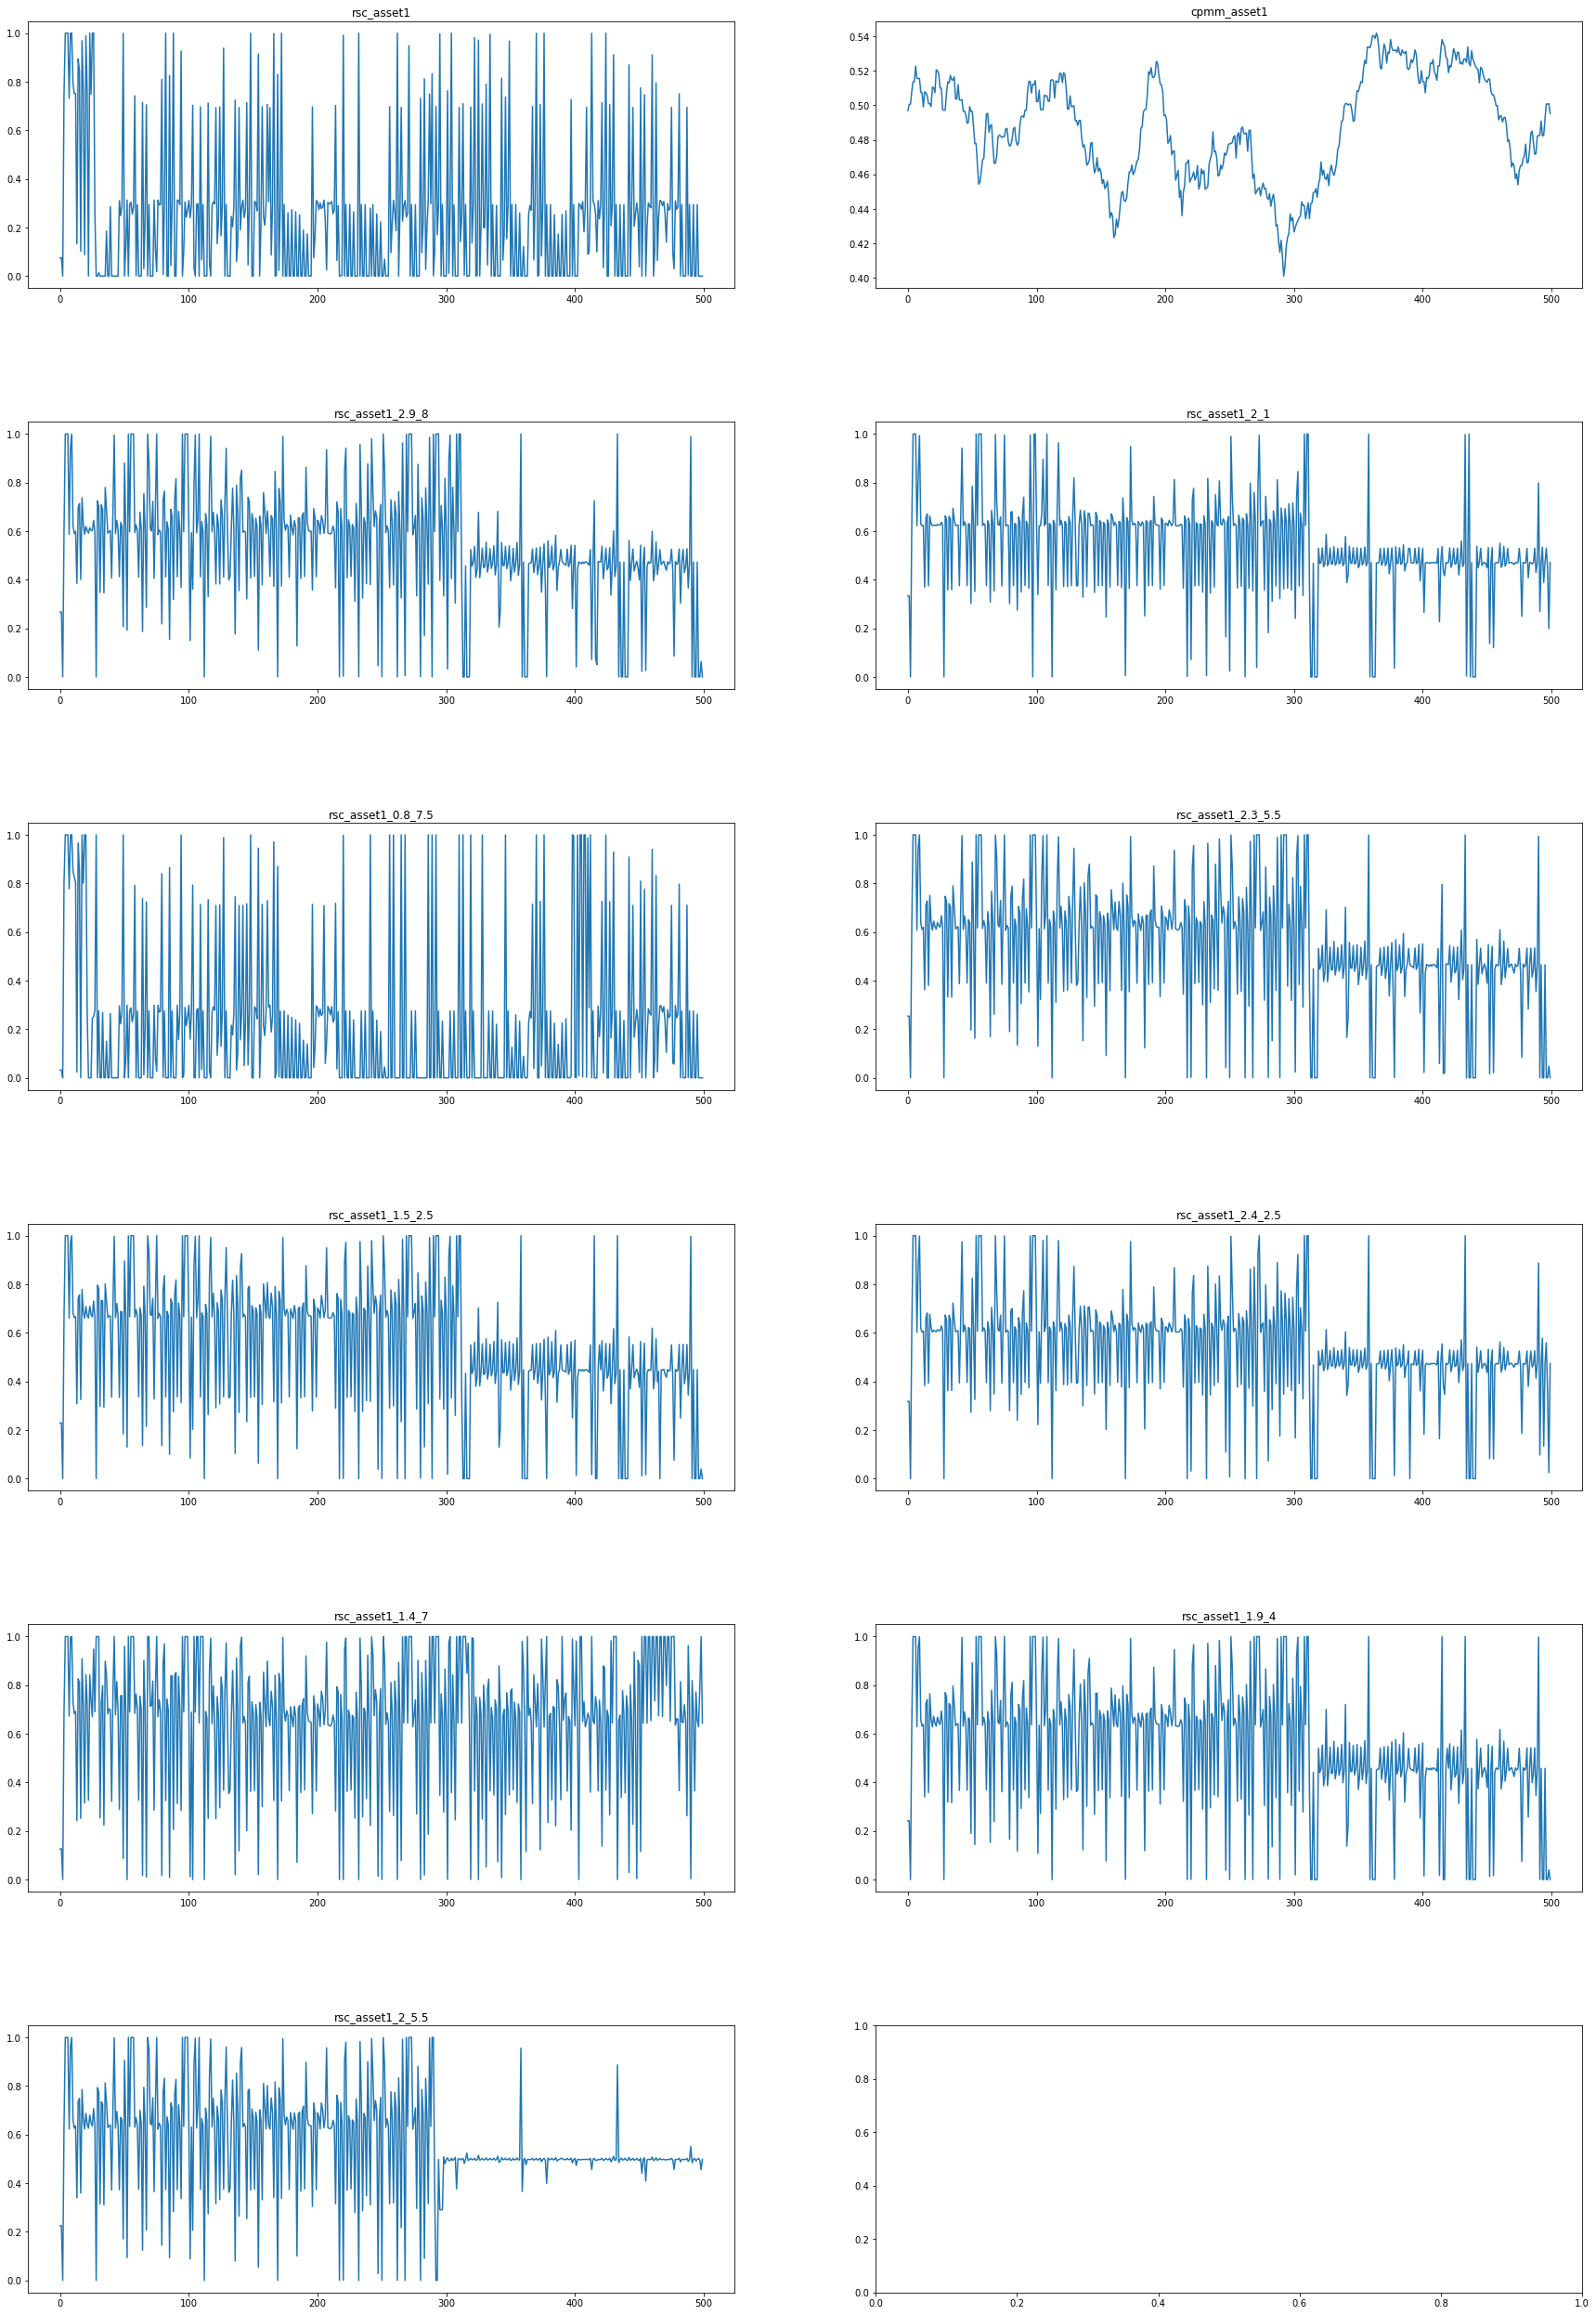

In [17]:
fig, axs = plt.subplots(6,2, figsize=(30, 45), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = 0.5, wspace= 0.2)

axs = axs.ravel()

for i in range(len(asset1_cols)):

    axs[i].plot(df[asset1_cols[i]])
    axs[i].set_title(asset1_cols[i])

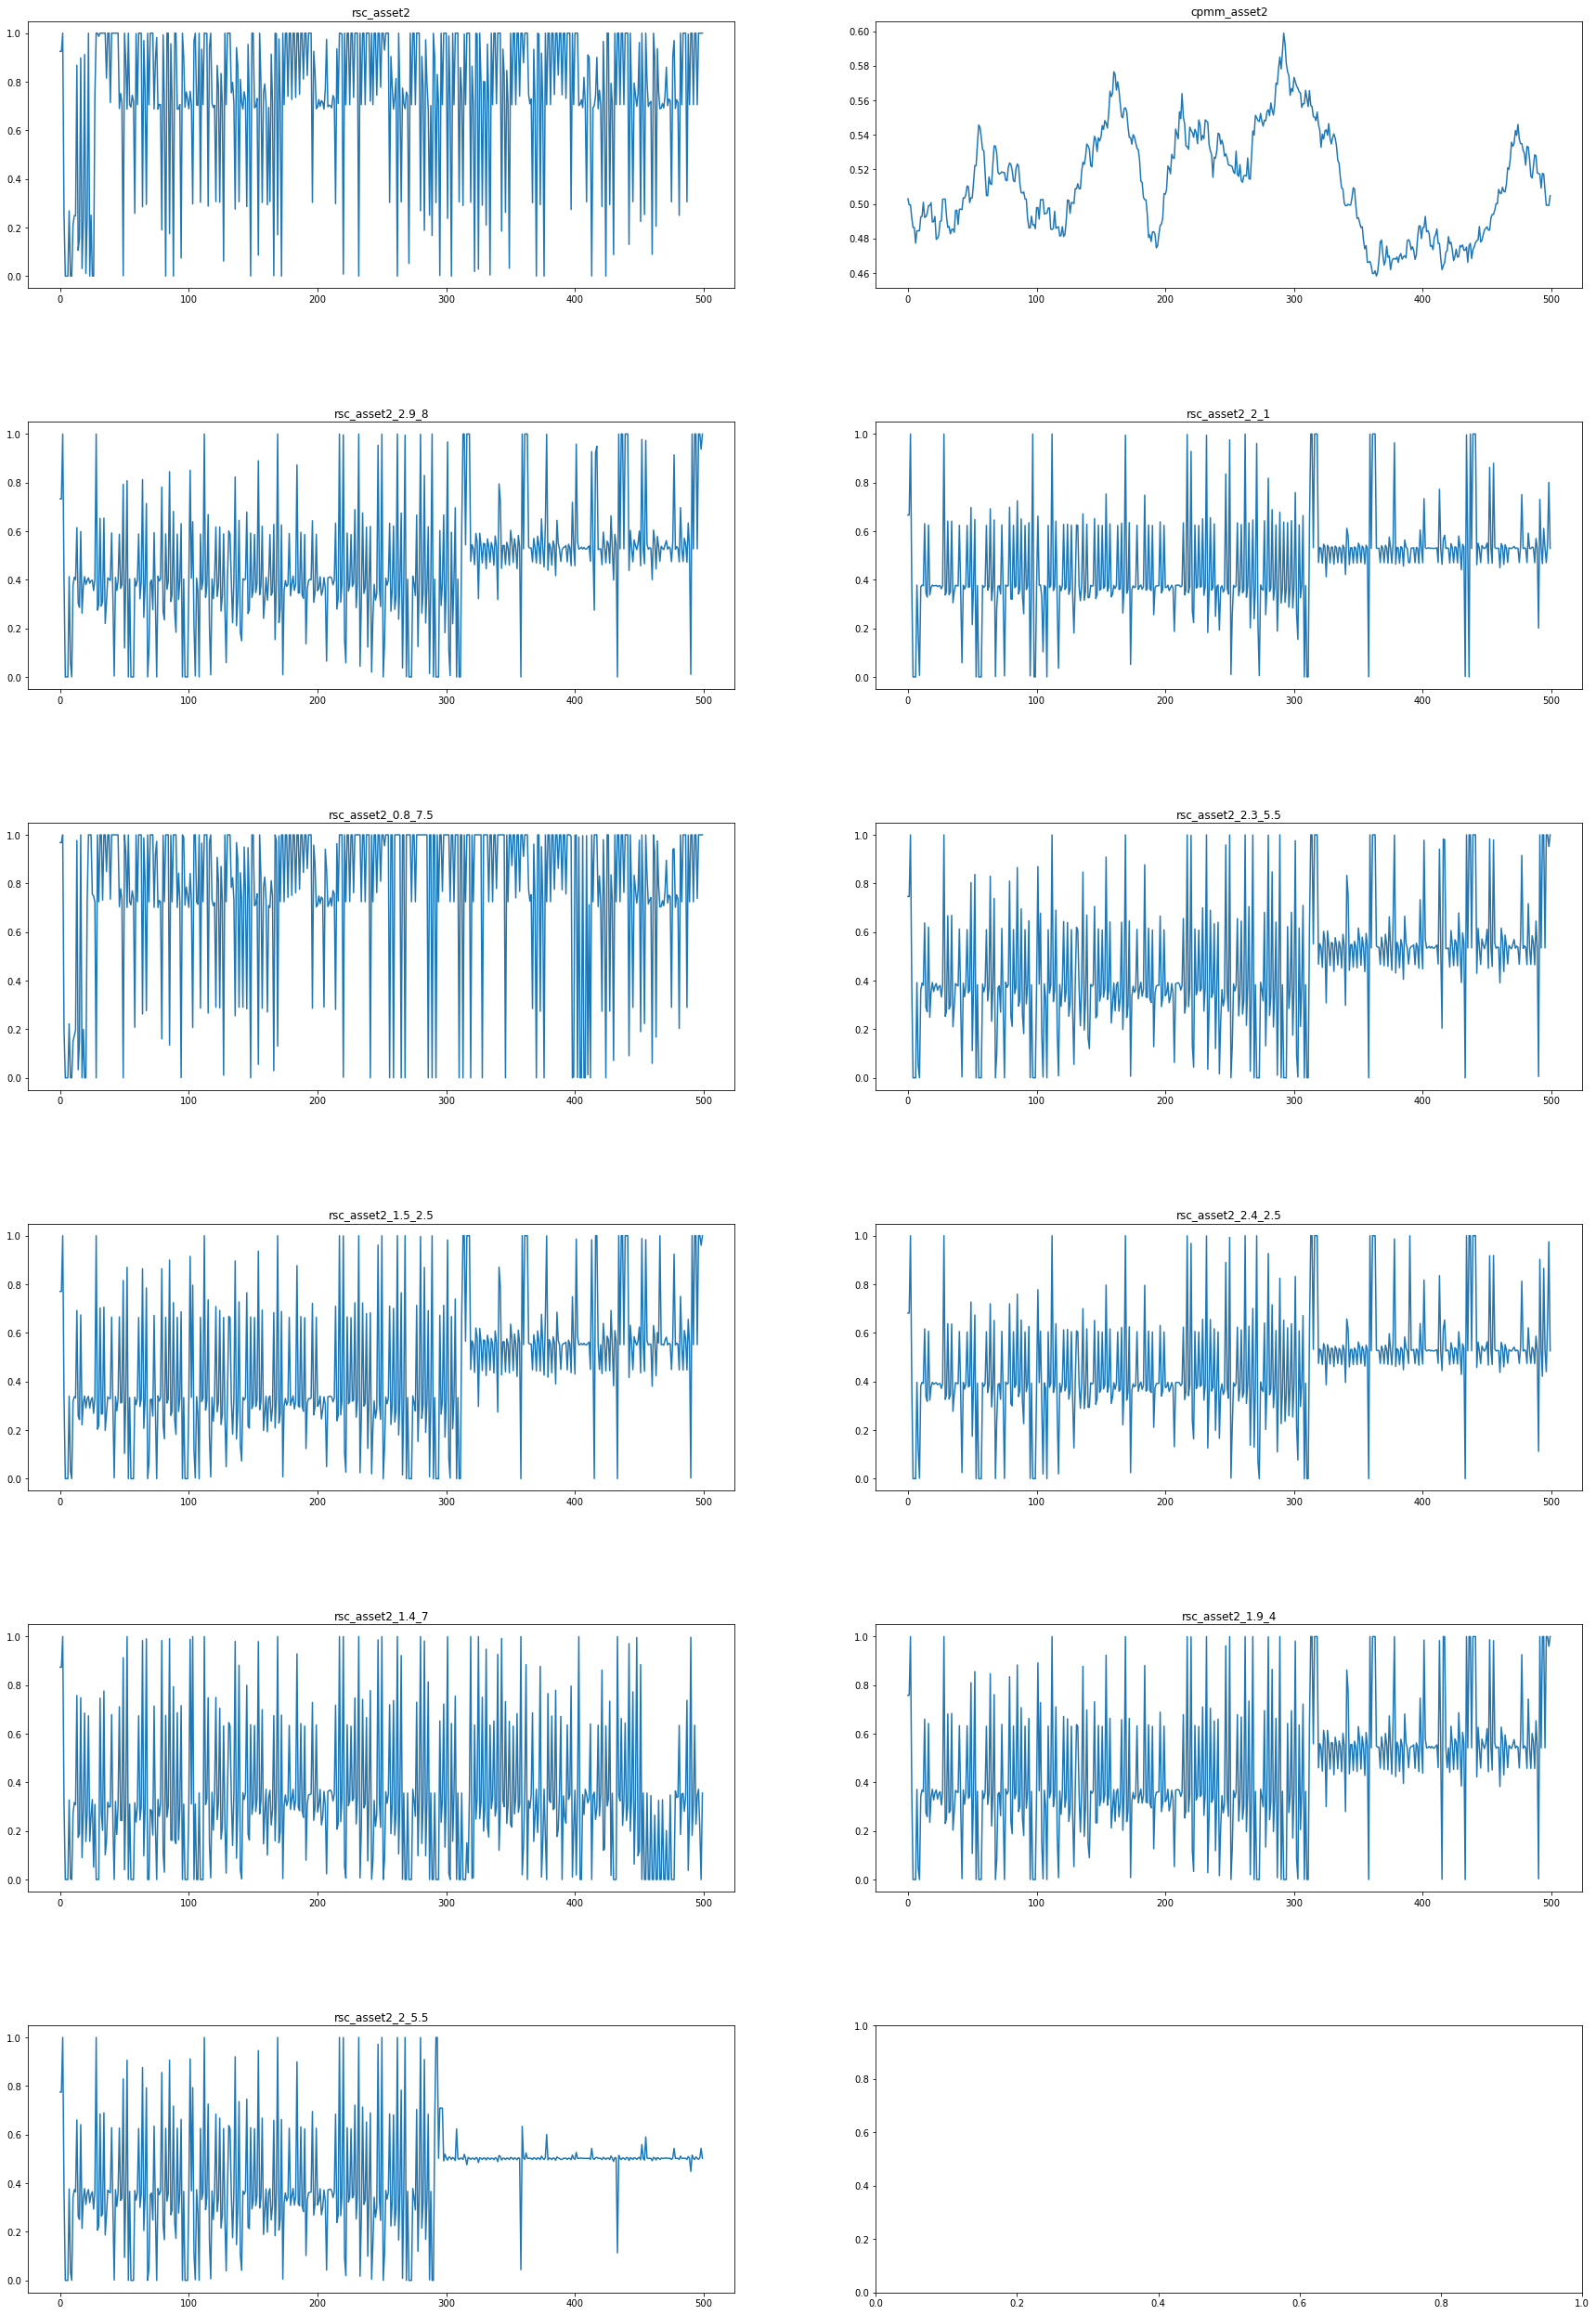

In [18]:
fig, axs = plt.subplots(6,2, figsize=(30, 45), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = 0.5, wspace= 0.2)

axs = axs.ravel()

for i in range(len(asset1_cols)):

    axs[i].plot(df[asset2_cols[i]])
    axs[i].set_title(asset2_cols[i])